# XPorter traffic volume problem

In [28]:
from sys import path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [29]:
model_dir = 'sample_code_submission/'                    
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from data_io import read_as_df
data_dir = './all_data'         
data_name = 'xporters'
data = read_as_df(data_dir  + '/' + data_name)               

Reading ./all_data/xporters_train from AutoML format
Number of examples = 38563
Number of features = 59


In [31]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : /home/kevin/projects/scooter/starting_kit/all_data/xporters_public.info
DataManager : xporters
info:
	usage = Sample dataset Traffic Volume data
	name = traffic
	task = regression
	target_type = Numerical
	feat_type = Numerical
	metric = r2_metric
	time_budget = 1200
	feat_num = 59
	target_num = 3
	label_num = 3
	train_num = 35
	valid_num = 35
	test_num = 35
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(38563, 59)
	Y_train = array(38563,)
	X_valid = array(4820, 59)
	Y_valid = array(0,)
	X_test = array(4820, 59)
	Y_test = array(0,)
feat_type:	array(59,)
feat_idx:	array(0,)



In [60]:
from data_io import write
from model import model

In [61]:
M = model()
trained_model_name = model_dir + data_name

In [62]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
if not(M.is_trained) : M.fit(X_train, Y_train)                     
Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

/home/kevin/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/kevin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/kevin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/kevin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/kevin/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/kevin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value 

In [63]:
M.save(trained_model_name)                 
result_name = result_dir + data_name

In [64]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: r2_metric


In [65]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the r2_metric metric = 0.9929
Ideal score for the r2_metric metric = 1.0000


## Visualisation

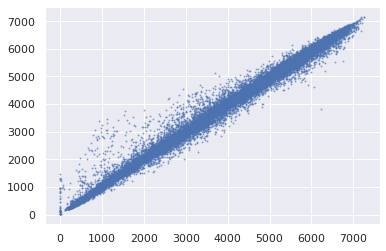

In [66]:
plt.scatter(Y_train, Y_hat_train, alpha ='0.5', s = 1 )
plt.show()

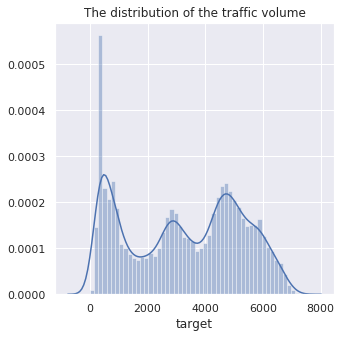

In [33]:
plt.figure(figsize = (5,5))
sns.distplot(data['target'], bins=50)
plt.title('The distribution of the traffic volume')
plt.show()

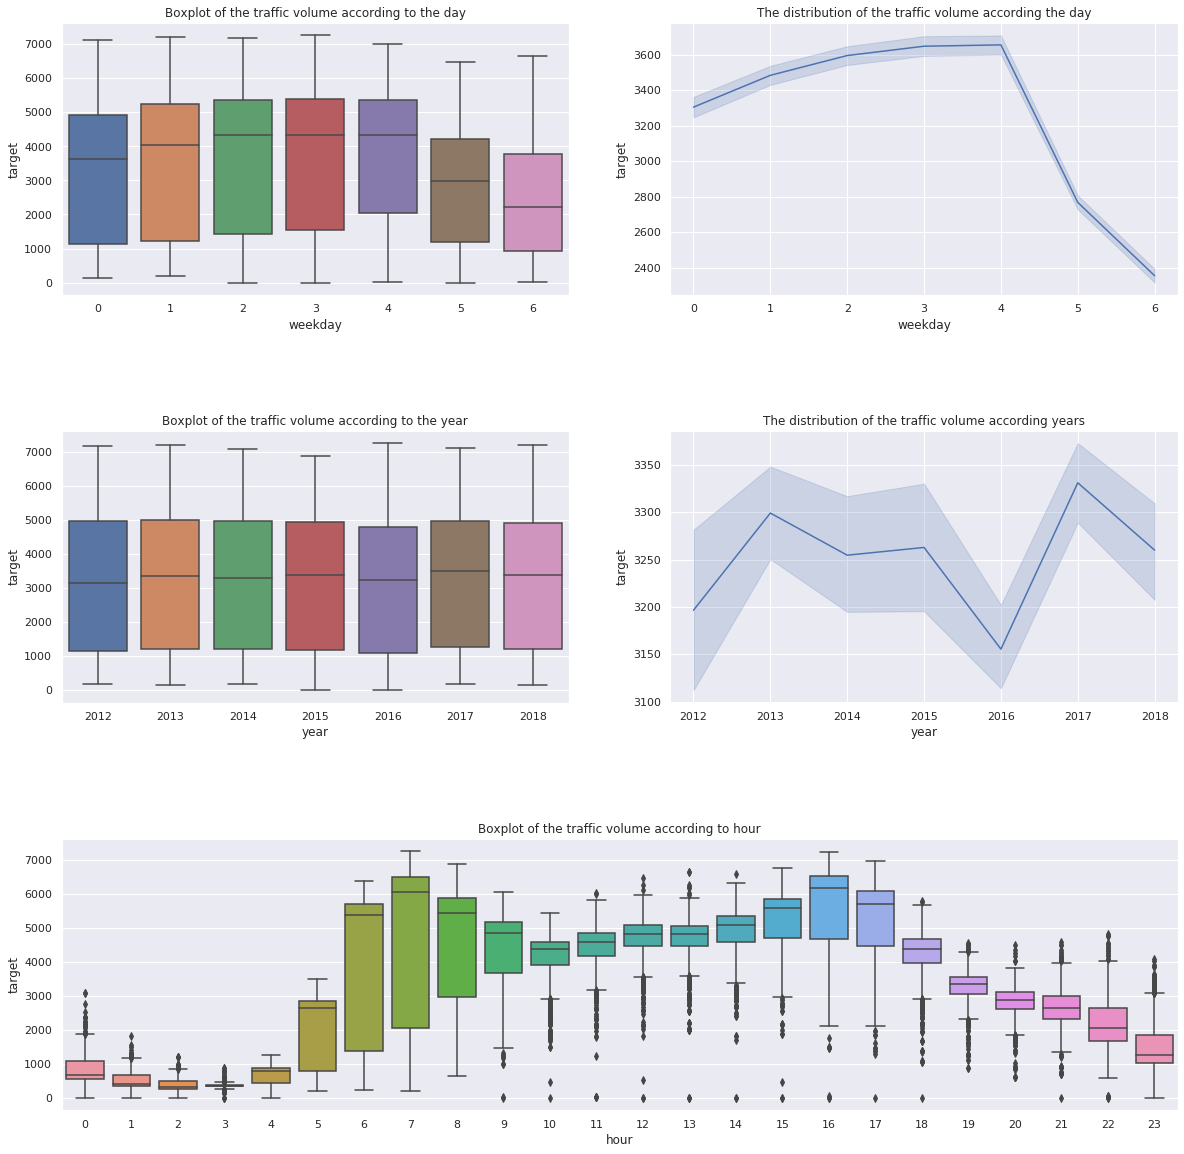

In [5]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(313)
sns.boxplot('hour','target', data= data)
plt.title('Boxplot of the traffic volume according to hour')

plt.subplot(321)
sns.boxplot('weekday','target', data= data)
plt.title('Boxplot of the traffic volume according to the day')
plt.subplot(322)
sns.lineplot('weekday','target', data= data)
plt.title("The distribution of the traffic volume according the day")

plt.subplot(323)
sns.boxplot('year','target', data= data)
plt.title('Boxplot of the traffic volume according to the year')
plt.subplot(324)
sns.lineplot('year','target', data= data)
plt.title("The distribution of the traffic volume according years")
plt.show()

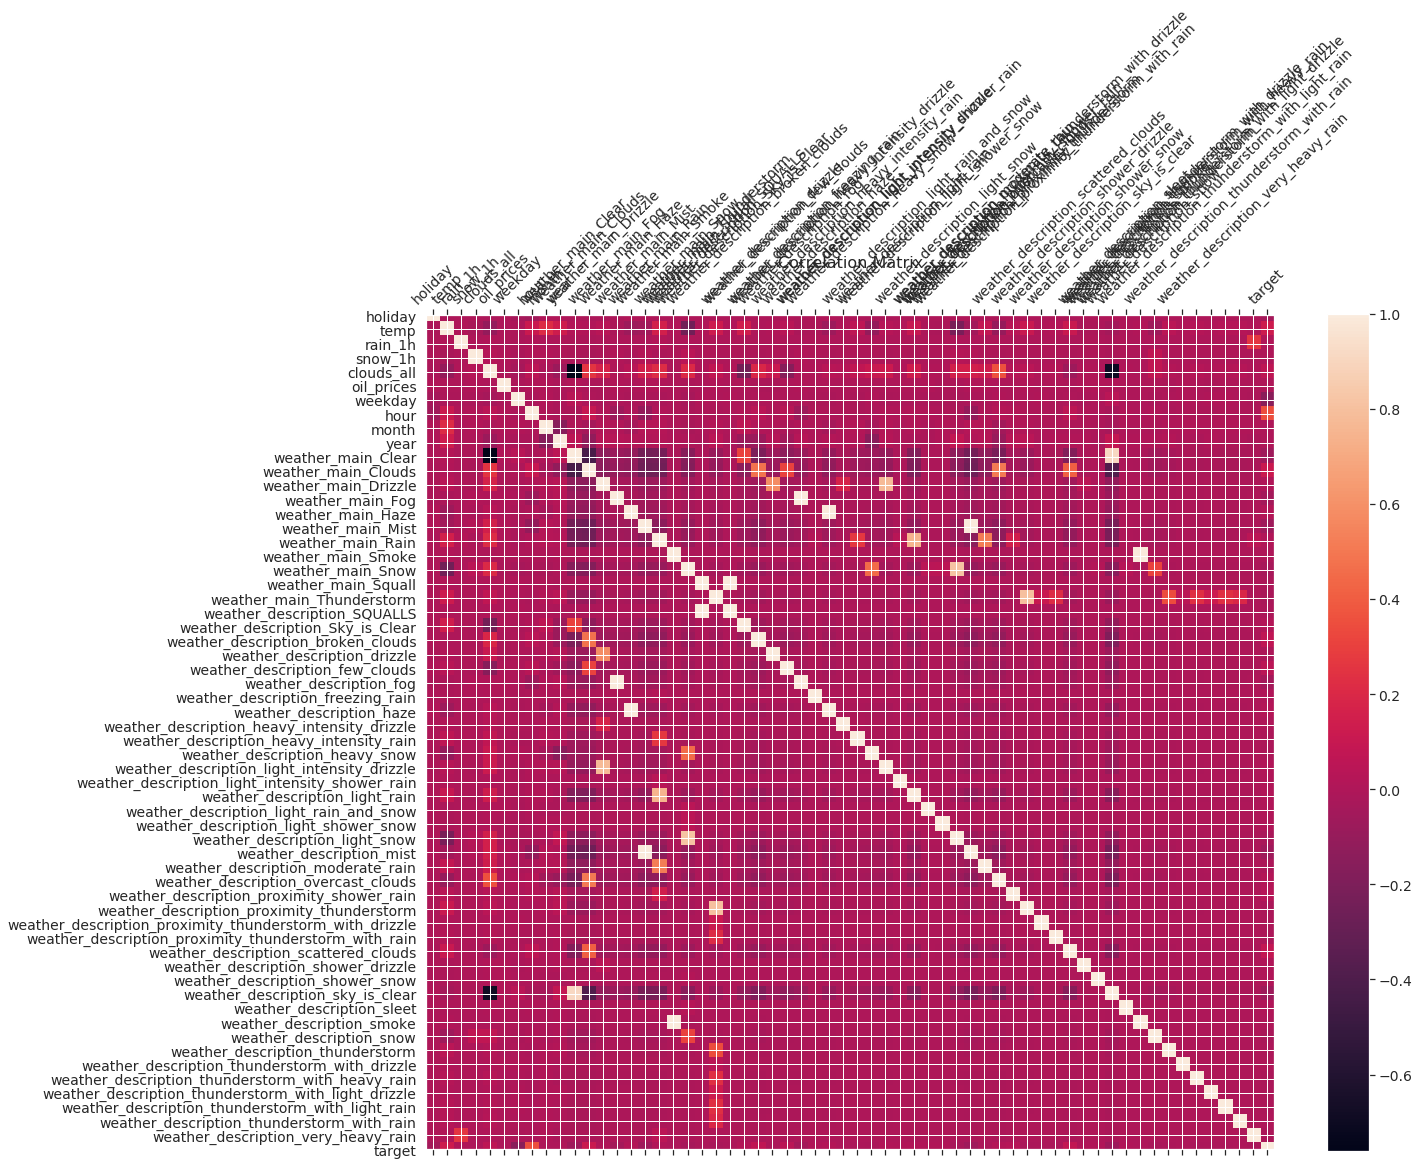

In [6]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Preprocessing

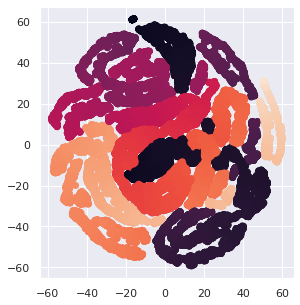

In [46]:
from sklearn.manifold import TSNE
X_tsne = TSNE(learning_rate=100).fit_transform(data)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data.target)

In [47]:
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#features = data.columns[0:len(data.columns)-1]
#x = data.loc[:, features].values
#y = data.loc[:,['target']].values

scaler = StandardScaler()
scaler.fit(data)
StandardScaler(copy=True ,with_mean=True ,with_std =True )
scaled_data =scaler.transform(data)

pca = PCA()
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
x_pca =pca. transform(scaled_data)
pca.explained_variance_ratio_

array([5.49040687e-02, 4.14003263e-02, 3.88948538e-02, 3.70404166e-02,
       3.48939295e-02, 3.44740363e-02, 3.43227737e-02, 3.40565132e-02,
       3.33487483e-02, 3.33441437e-02, 2.39420923e-02, 2.14462519e-02,
       2.09584867e-02, 2.00763639e-02, 1.85848329e-02, 1.83991141e-02,
       1.78199425e-02, 1.77005515e-02, 1.74697159e-02, 1.73369045e-02,
       1.70939561e-02, 1.69251938e-02, 1.68518581e-02, 1.67708425e-02,
       1.67407674e-02, 1.67096098e-02, 1.66967473e-02, 1.66922727e-02,
       1.66857946e-02, 1.66845490e-02, 1.66813658e-02, 1.66755954e-02,
       1.66742649e-02, 1.66710760e-02, 1.66707384e-02, 1.66694597e-02,
       1.66688923e-02, 1.66673668e-02, 1.65869826e-02, 1.63640767e-02,
       1.61078420e-02, 1.56036406e-02, 1.53678659e-02, 1.38090971e-02,
       1.23390772e-02, 1.02375124e-02, 8.90168055e-03, 3.03780811e-03,
       1.30773225e-32, 5.71530507e-33, 3.12983817e-33, 2.71626121e-33,
       2.03740068e-33, 1.89986426e-33, 1.49838647e-33, 1.01007869e-33,
      

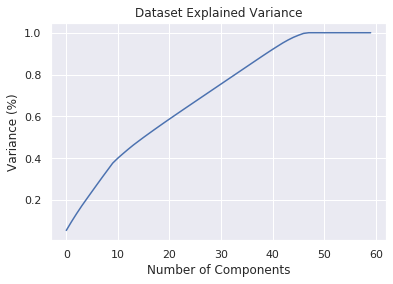

In [50]:

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [51]:
n_pcs= pca.n_components_
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)


['weather_main_Clear', 'weather_main_Clouds', 'weather_main_Rain', 'weather_description_mist', 'weather_main_Drizzle', 'weather_main_Haze', 'weather_main_Fog', 'weather_main_Thunderstorm', 'weather_main_Smoke', 'weather_main_Squall', 'target', 'year', 'rain_1h', 'weather_description_scattered_clouds', 'weather_description_broken_clouds', 'weather_description_broken_clouds', 'snow_1h', 'weather_description_snow', 'weather_description_moderate_rain', 'holiday', 'oil_prices', 'weather_description_heavy_intensity_rain', 'weather_description_drizzle', 'weather_description_proximity_thunderstorm', 'weather_description_light_shower_snow', 'weather_description_proximity_shower_rain', 'weather_description_heavy_intensity_drizzle', 'weather_description_heavy_intensity_drizzle', 'weather_description_thunderstorm_with_heavy_rain', 'weather_description_thunderstorm_with_light_rain', 'weather_description_thunderstorm_with_rain', 'weather_description_thunderstorm_with_light_drizzle', 'weather_descrip

In [52]:
from sklearn.feature_selection import SelectKBest, f_regression
X = data[data.columns[0:len(data.columns)-1]].values
Y = data[data.columns[-1]].values
X_new=SelectKBest(score_func=f_regression,k=47).fit_transform(X,Y)
initial_feature_names = data.columns
for i in initial_feature_names:
    for j in range(47):
         a = np.equal(X_new[:,j],data[i].values)
    if a[j] :
        print(i)

holiday
rain_1h
snow_1h
weather_main_Clouds
weather_main_Drizzle
weather_main_Fog
weather_main_Haze
weather_main_Mist
weather_main_Rain
weather_main_Smoke
weather_main_Snow
weather_main_Squall
weather_main_Thunderstorm
weather_description_SQUALLS
weather_description_Sky_is_Clear
weather_description_broken_clouds
weather_description_drizzle
weather_description_few_clouds
weather_description_fog
weather_description_freezing_rain
weather_description_haze
weather_description_heavy_intensity_drizzle
weather_description_heavy_intensity_rain
weather_description_heavy_snow
weather_description_light_intensity_drizzle
weather_description_light_intensity_shower_rain
weather_description_light_rain
weather_description_light_rain_and_snow
weather_description_light_shower_snow
weather_description_light_snow
weather_description_mist
weather_description_moderate_rain
weather_description_overcast_clouds
weather_description_proximity_shower_rain
weather_description_proximity_thunderstorm
weather_descript

## Model

In [53]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

#DecisionTreeRegressor 
from sklearn import tree

#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

#ExtraTreesRegressor 
from sklearn.ensemble import ExtraTreesRegressor

#BaggingRegressor
from sklearn.ensemble import BaggingRegressor

#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

model_name = ["KNeighbors", "DecisionTree ", "RandomForest", "GradientBoosting",
         "ExtraTrees","Bagging","AdaBoost"]

model_list = [
    KNeighborsRegressor(),
    tree.DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    BaggingRegressor(),
    AdaBoostRegressor()
]


In [54]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np 
import matplotlib.pyplot as plt 
scores = []
for i in range(len(model_list)):
    scores.append(cross_val_score(model_list[i], X_train, Y_train, cv=5, scoring=make_scorer(scoring_function)))
score = np.array(scores)

In [55]:
mean= np.empty(len(model_list))
var = np.empty(len(model_list))
for i in range(len(model_list)):
    mean[i] = np.mean(score[i,:])
    var[i] = np.var(score[i,:])

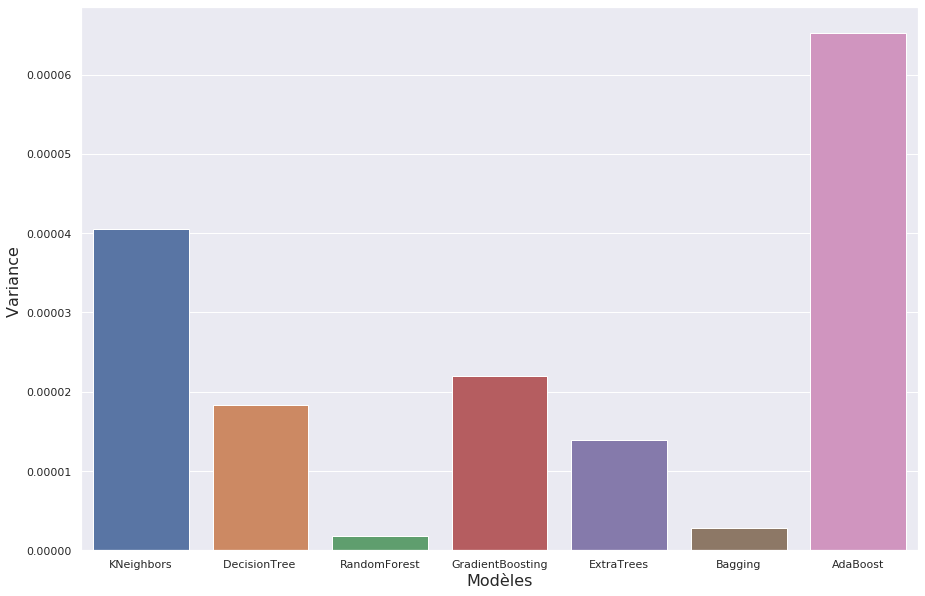

In [56]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax= sns.barplot(x=model_name,
            y=var)
plt.xlabel('Modèles', fontsize=16)
plt.ylabel('Variance ', fontsize=16)
plt.savefig('var.png',dpi=500)

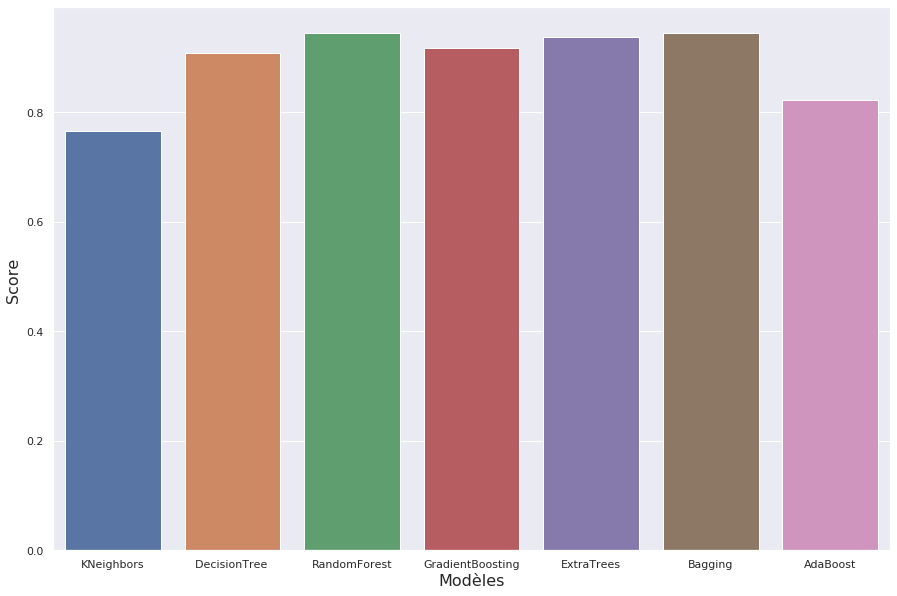

In [57]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x=model_name,
            y=mean)
plt.xlabel('Modèles', fontsize=16)
plt.ylabel('Score ', fontsize=16)
plt.savefig('score.png',dpi=500)

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters = {'n_estimators' :[40,50,60],'n_jobs':[-1,1],'warm_start':[True,False]}
model = BaggingRegressor()
clf = GridSearchCV(model,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'n_estimators': 50, 'n_jobs': 1, 'warm_start': False}
